# I. Project Team Members

| Prepared by | Email | Prepared for |
| :-: | :-: | :-: |
| **Hardefa Rogonondo** | hardefarogonondo@gmail.com | **MoneyLion Credit Risk Optimization Engine** |

# II. Notebook Target Definition

_Insert Text Here_

# III. Notebook Setup

## III.A. Import Libraries

In [1]:
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## III.B. Import Data

In [2]:
df = pd.read_pickle('../../data/processed/df.pkl')
df.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF,installmentCount,collectionExist,principalSum,feesSum,paymentAmountSum,paymentStatusCounts,paymentReturnCodeCounts,inquiry.thirtydaysago,inquiry.twentyfourhoursago,inquiry.oneminuteago,inquiry.onehourago,inquiry.ninetydaysago,inquiry.sevendaysago,inquiry.tenminutesago,inquiry.fifteendaysago,inquiry.threesixtyfivedaysago,indicator.inquiryonfilecurrentaddressconflict,indicator.totalnumberoffraudindicators,indicator.telephonenumberinconsistentwithaddress,indicator.inquiryageyoungerthanssnissuedate,indicator.onfileaddresscautious,indicator.inquiryaddressnonresidential,indicator.onfileaddresshighrisk,indicator.ssnreportedmorefrequentlyforanother,indicator.currentaddressreportedbytradeopenlt90days,indicator.inputssninvalid,indicator.inputssnissuedatecannotbeverified,indicator.inquiryaddresscautious,indicator.morethan3inquiriesinthelast30days,indicator.onfileaddressnonresidential,indicator.creditestablishedpriortossnissuedate,indicator.driverlicenseformatinvalid,indicator.inputssnrecordedasdeceased,indicator.inquiryaddresshighrisk,indicator.inquirycurrentaddressnotonfile,indicator.bestonfilessnissuedatecannotbeverified,indicator.highprobabilityssnbelongstoanother,indicator.maxnumberofssnswithanybankaccount,indicator.bestonfilessnrecordedasdeceased,indicator.currentaddressreportedbynewtradeonly,indicator.creditestablishedbeforeage18,indicator.telephonenumberinconsistentwithstate,indicator.driverlicenseinconsistentwithonfile,indicator.workphonepreviouslylistedascellphone,indicator.workphonepreviouslylistedashomephone,identityverif.ssnnamematch,identityverif.nameaddressmatch,identityverif.phonematchtype,identityverif.ssnnamereasoncodedescription,identityverif.phonematchresult,identityverif.nameaddressreasoncodedescription,identityverif.phonematchtypedescription,identityverif.overallmatchresult,identityverif.phonetype,identityverif.ssndobreasoncode,identityverif.ssnnamereasoncode,identityverif.nameaddressreasoncode,identityverif.ssndobmatch,identityverif.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,NaT,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,2016-01-20 15:49:18.846,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1,25.0,False,3691.28,3395.19,7086.47,"{'Checked': 22, 'Cancelled': 3}",{},3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,False,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1.0,False,False,False,True,True,False,False,match,match,NaN,NaN,invalid,NaN,NaN,partial,NaN,D04,NaN,NaN,invalid,5.0,879.0,569eb3a3e4b096699f685d64
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,NaT,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,NaT,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

# IV. Exploratory Data Analysis

## IV.A. Data Shape Inspection

In [3]:
df.shape

(577426, 80)

## IV.B. Data Information Inspection

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577426 entries, 0 to 577425
Data columns (total 80 columns):
 #   Column                                               Non-Null Count   Dtype         
---  ------                                               --------------   -----         
 0   loanId                                               577426 non-null  object        
 1   anon_ssn                                             577426 non-null  object        
 2   payFrequency                                         576156 non-null  object        
 3   apr                                                  573760 non-null  float64       
 4   applicationDate                                      577426 non-null  datetime64[ns]
 5   originated                                           577426 non-null  bool          
 6   originatedDate                                       46044 non-null   datetime64[ns]
 7   nPaidOff                                             577402 non-null  floa

## IV.C. Missing Values Inspection

In [5]:
df_missing = pd.DataFrame(
    df.isnull().sum().sort_values() / len(df) * 100).reset_index()
df_missing.columns = ["variables", "missing_percentage"]
df_missing

,variables,missing_percentage
0,loanId,0.000000
1,anon_ssn,0.000000
2,originated,0.000000
3,applicationDate,0.000000
4,originallyScheduledPaymentAmount,0.000000
5,leadType,0.000000
6,isFunded,0.000000
7,approved,0.000000
8,leadCost,0.000000
9,hasCF,0.000000


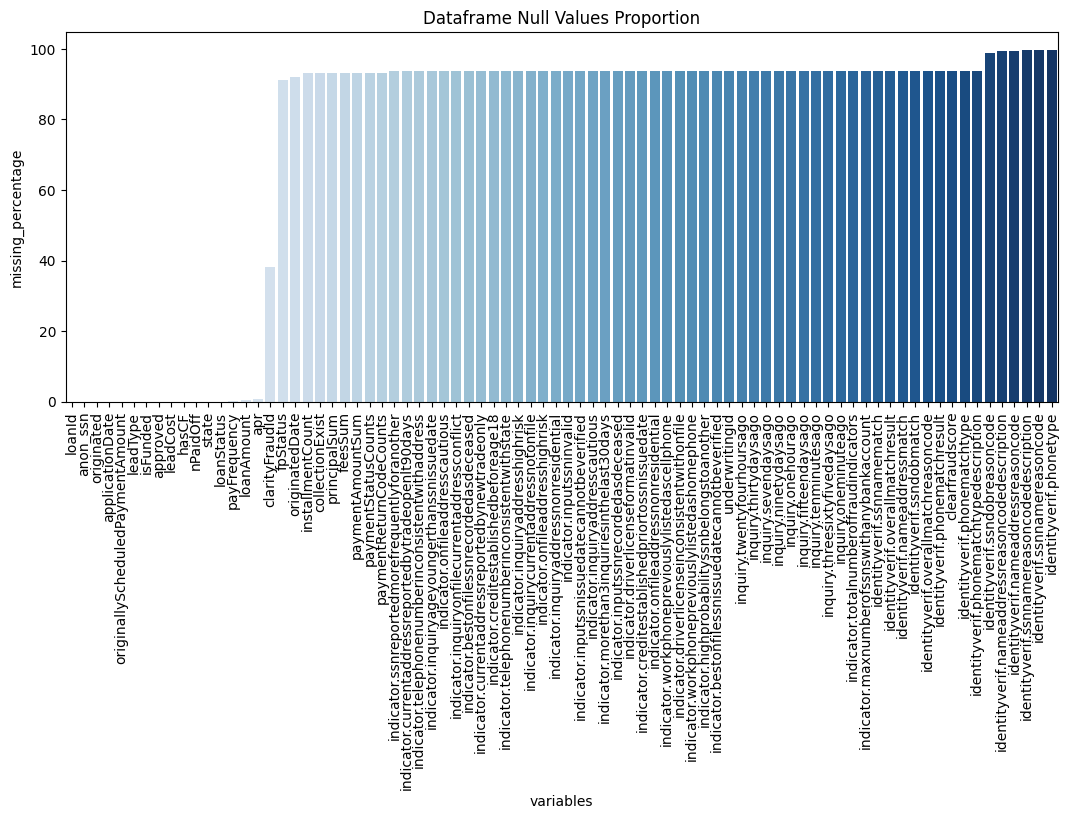

In [6]:
plt.figure(figsize=(12.8, 4.8))
sns.barplot(data=df_missing,
            x="variables",
            y="missing_percentage",
            hue="variables",
            palette='Blues',
            legend=False)
plt.title("Dataframe Null Values Proportion")
plt.xticks(rotation='vertical')
plt.show()

**Note**: The newly joined dataset contains many missing values due to the limited overlap in the Fraud IDs used to join the _loans_ and _clarity_underwriting_variables_ datasets. Although we anticipated this during the data preparation process, we proceeded with the join. To address this, we will drop columns with more than a 90% missing rate. Additionally, the _'clarityFraudId'_ column, which has a missing value rate above 30% and was used solely for joining the datasets, will also be dropped.

### IV.C.1. Missing Values Handling

In [7]:
def remove_high_missing_columns(df, threshold=0.3):
    missing_rate = df.isnull().sum() / len(df)
    cols_to_remove = missing_rate[missing_rate > threshold].index
    df_cleaned = df.drop(columns=cols_to_remove)
    return df_cleaned

def handle_missing_values(df):
    for column in df.columns:
        if df[column].dtype == 'object':  # Categorical columns
            df[column].fillna('Null', inplace=True)
        else:  # Numerical columns
            mode_value = mode(df[column].dropna())[0][0]  # Calculate the mode, excluding NaN values
            df[column].fillna(mode_value, inplace=True)
    return df

In [8]:
df_cleaned = remove_high_missing_columns(df)
df_cleaned.shape

(577426, 16)

================================================= add note here to fill null values ============================================================

In [9]:
df_cleaned_missing = pd.DataFrame(
    df_cleaned.isnull().sum().sort_values() / len(df_cleaned) * 100).reset_index()
df_cleaned_missing.columns = ["variables", "missing_percentage"]
df_cleaned_missing

,variables,missing_percentage
0,loanId,0.000000
1,anon_ssn,0.000000
2,originated,0.000000
3,applicationDate,0.000000
4,approved,0.000000
5,leadCost,0.000000
6,originallyScheduledPaymentAmount,0.000000
7,isFunded,0.000000
8,hasCF,0.000000
9,leadType,0.000000


## IV.D. Duplicated Values Inspection

In [11]:
df_duplicated = df_cleaned[df_cleaned.duplicated(subset="loanId", keep=False)]
df_duplicated.shape

(0, 16)

In [12]:
df_duplicated

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,hasCF


## IV.E. Data Visualization

**Note**: Before visualizing our remaining columns for analysis, we need to decide which column will be used as our target label for modeling.

In [13]:
df_cleaned.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23 17:29:01.940,False,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19 22:07:36.778,True,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01 13:51:14.709,False,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06 23:58:08.880,False,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05 22:31:34.304,False,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,1


**Note**: There is a suspicion that some columns may contain the same values but in different formats. For example, the _'approved'_ column may have the same values as _'isFunded'_, as well as _'originated'_ with _'isFunded'_. We will analyze this suspicion further.

In [14]:
def find_mismatched_rows(df, col1, col2):
    normalized_col1 = df[col1].astype(int)
    normalized_col2 = df[col2].map({0: False, 1: True}).astype(int)
    mismatch = normalized_col1 != normalized_col2
    mismatched_rows = df[mismatch]
    return mismatched_rows

In [15]:
mismatched_rows = find_mismatched_rows(df_cleaned, "approved", "isFunded")
mismatched_rows.shape

(1054, 16)

In [16]:
mismatched_rows.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,hasCF
678,LL-I-02278706,21f9ff1307d4e5592d5e8169ab351bb0,B,680.0,2015-08-07 10:24:46.482,True,0.0,True,0,Customer Voided New Loan,500.0,1593.68,TX,lead,75,1
829,LL-I-16850875,0835b31ec0adcbea1576b087305a5c88,B,359.0,2017-02-07 21:04:07.885,True,0.0,True,0,Credit Return Void,1800.0,3492.83,VA,lead,25,1
1189,LL-I-01186676,81dcae7ec1ef9165b6d79a4aa18bfe05,M,475.0,2015-05-18 19:22:33.477,True,0.0,True,0,Customer Voided New Loan,300.0,681.22,OH,bvMandatory,10,1
1227,LL-I-04993955,1f76f1c3b4c5af830aa33d39d018cfc8,B,360.0,2015-11-25 14:09:42.251,True,0.0,True,0,Credit Return Void,500.0,978.27,IL,lead,100,1
1779,LL-I-12760771,89f387ef9f0985efb501c6f339069d15,S,645.0,2016-12-09 10:13:30.546,True,0.0,True,0,Credit Return Void,1200.0,4158.84,KY,lead,6,1


In [17]:
mismatched_rows = find_mismatched_rows(df_cleaned, "originated", "isFunded")
mismatched_rows.shape

(7024, 16)

In [18]:
mismatched_rows.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,hasCF
207,LL-I-11860613,d35430b9a3625ab2194cb16689a35fc7,M,325.00,2016-09-08 10:56:35.087,True,0.0,False,0,Withdrawn Application,300.0,599.55,TX,prescreen,0,1
269,LL-I-17841301,5a7ee95e399d7498dbc1ade29006575d,S,680.00,2017-03-01 19:39:57.287,True,0.0,False,0,Withdrawn Application,600.0,2038.93,TX,lead,25,1
442,LL-I-09803072,01ea9e73e0ee191f9610a7bb2579b9be,B,360.00,2016-06-18 06:42:49.070,True,0.0,False,0,Withdrawn Application,600.0,1254.51,IL,bvMandatory,6,1
488,LL-I-12080798,ae3cf26f0a6a8b14014f529361414ba4,B,449.99,2016-09-25 17:56:50.963,True,1.0,False,0,Withdrawn Application,350.0,616.85,WI,organic,0,1
528,LL-I-14993918,2017d66a3305da8cb50d9161ccbbfdae,S,645.00,2017-01-12 17:01:06.669,True,0.0,False,0,Withdrawn Application,800.0,2606.60,MN,lead,25,1


**Note**: Since we have confirmed that some rows differ from each other, we can now analyze our data further before determining our target label. The target label selection will be less straightforward to avoid data leakage, as the number of differing rows is quite low.

### IV.E.1. Pay Frequency Distribution

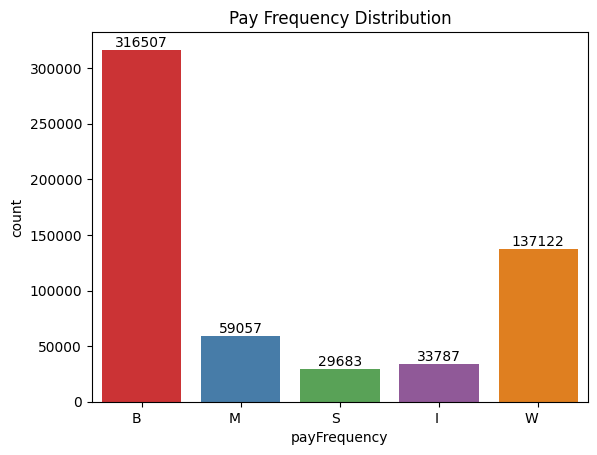

In [19]:
plt.title("Pay Frequency Distribution")
payFrequency_distribution = sns.countplot(
    data=df_cleaned, x="payFrequency", hue="payFrequency", palette='Set1', legend=False)
for container in payFrequency_distribution.containers:
    payFrequency_distribution.bar_label(container)
for item in payFrequency_distribution.get_xticklabels():
    item.set_horizontalalignment('right')
plt.show()

### IV.E.2. Annual Percentage Rate Distribution

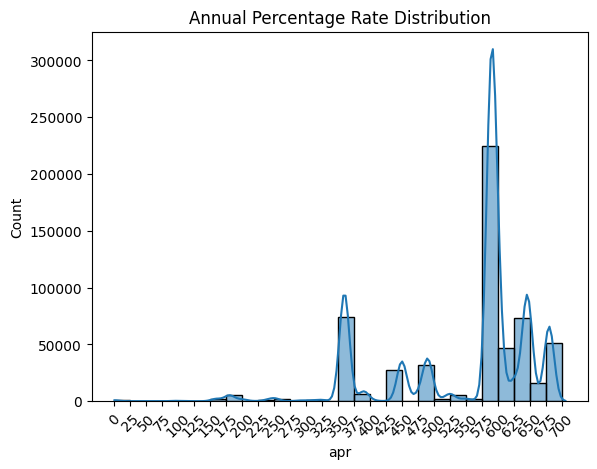

In [20]:
plt.title("Annual Percentage Rate Distribution")
apr_bins = np.arange(df_cleaned["apr"].min(), df_cleaned["apr"].max(), 25)
apr_plot = sns.histplot(data = df_cleaned,
                        x = "apr",
                        bins = apr_bins,
                        kde = True)
apr_plot.set_xticks(apr_bins)
plt.xticks(rotation = 45)
plt.show()

### IV.E.3. Loan Application Timespan Inspection

In [21]:
first_app_date = df_cleaned["applicationDate"].min()
last_app_date = df_cleaned["applicationDate"].max()

print(f"First Application Date: {first_app_date}")
print(f"Last Application Date: {last_app_date}")

First Application Date: 2014-12-03 00:31:22.306000
Last Application Date: 2017-03-18 23:58:42.921000


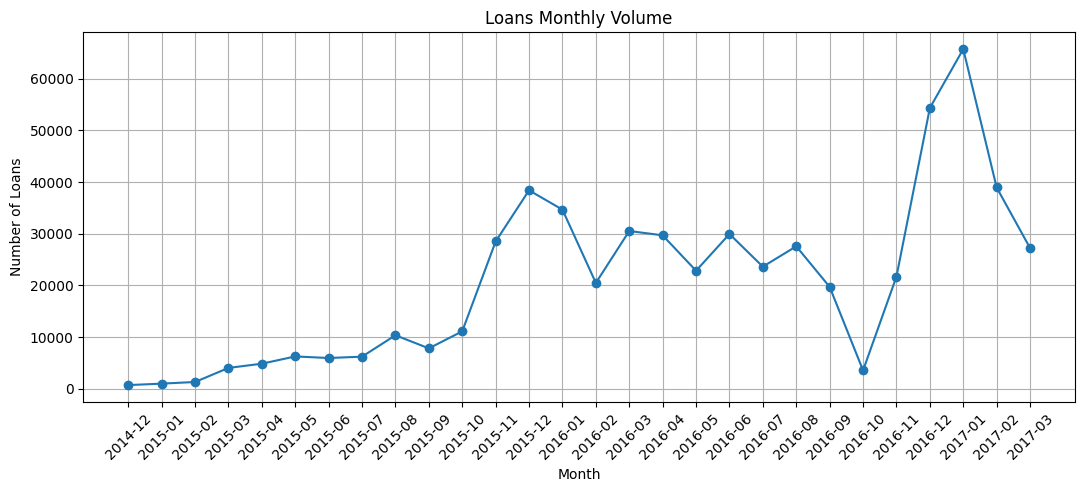

In [22]:
loans_monthly_volume = df_cleaned["applicationDate"].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(12.8, 4.8))
plt.plot(loans_monthly_volume.index.astype(str), loans_monthly_volume.values, marker='o')
plt.title("Loans Monthly Volume")
plt.xlabel("Month")
plt.ylabel("Number of Loans")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### IV.E.4. Originated Loans Distribution

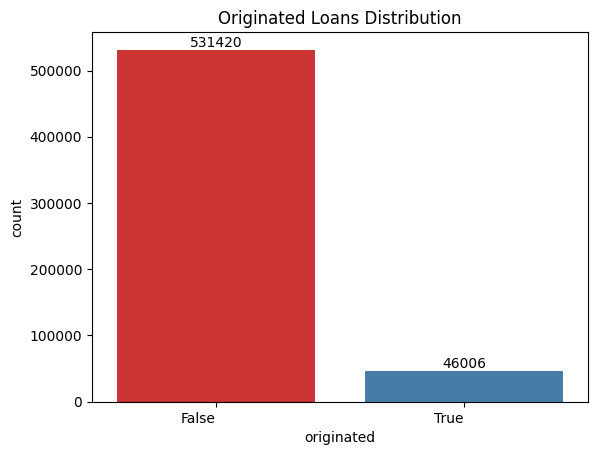

In [24]:
plt.title("Originated Loans Distribution")
originated_distribution = sns.countplot(
    data=df_cleaned, x="originated", hue="originated", palette='Set1', legend=False)
for container in originated_distribution.containers:
    originated_distribution.bar_label(container)
for item in originated_distribution.get_xticklabels():
    item.set_horizontalalignment('right')
plt.show()

### IV.E.5. Paid-Off Loans Distribution

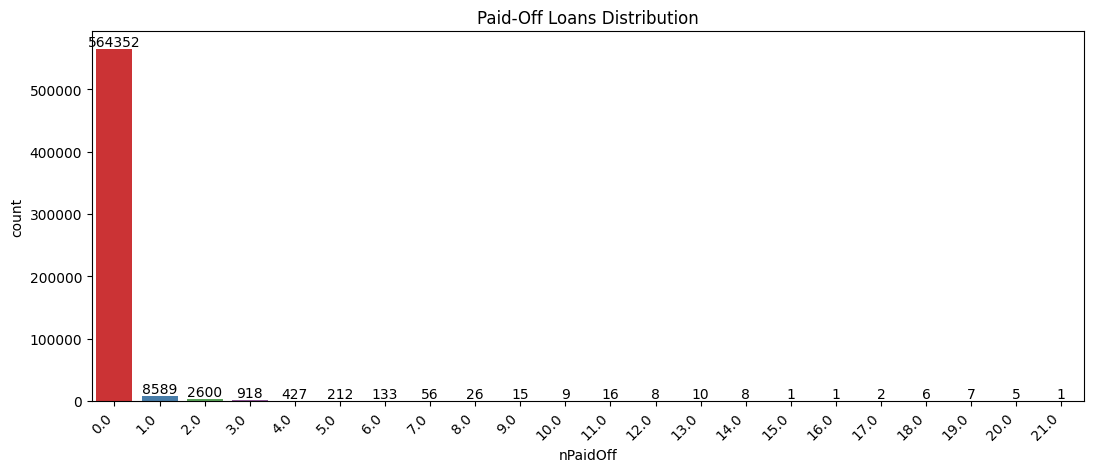

In [28]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Paid-Off Loans Distribution")
nPaidOff_distribution = sns.countplot(
    data=df_cleaned, x="nPaidOff", hue="nPaidOff", palette='Set1', legend=False)
for container in nPaidOff_distribution.containers:
    nPaidOff_distribution.bar_label(container)
for item in nPaidOff_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.6. Approved Loans Distribution

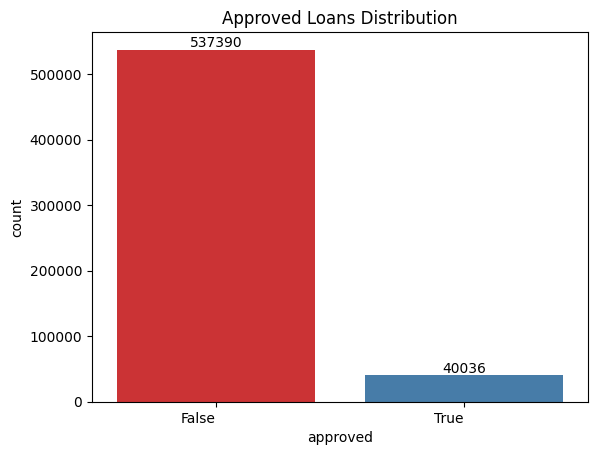

In [30]:
plt.title("Approved Loans Distribution")
approved_distribution = sns.countplot(
    data=df_cleaned, x="approved", hue="approved", palette='Set1', legend=False)
for container in approved_distribution.containers:
    approved_distribution.bar_label(container)
for item in approved_distribution.get_xticklabels():
    item.set_horizontalalignment('right')
plt.show()

### IV.E.7. Funded Loans Distribution

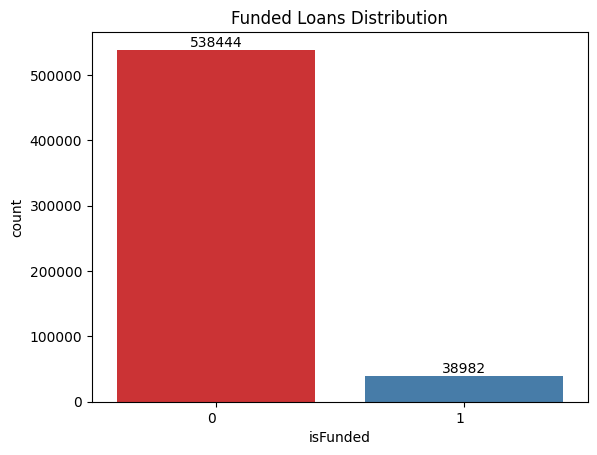

In [31]:
plt.title("Funded Loans Distribution")
isFunded_distribution = sns.countplot(
    data=df_cleaned, x="isFunded", hue="isFunded", palette='Set1', legend=False)
for container in isFunded_distribution.containers:
    isFunded_distribution.bar_label(container)
for item in isFunded_distribution.get_xticklabels():
    item.set_horizontalalignment('right')
plt.show()

### IV.E.8. Loan Status Distribution

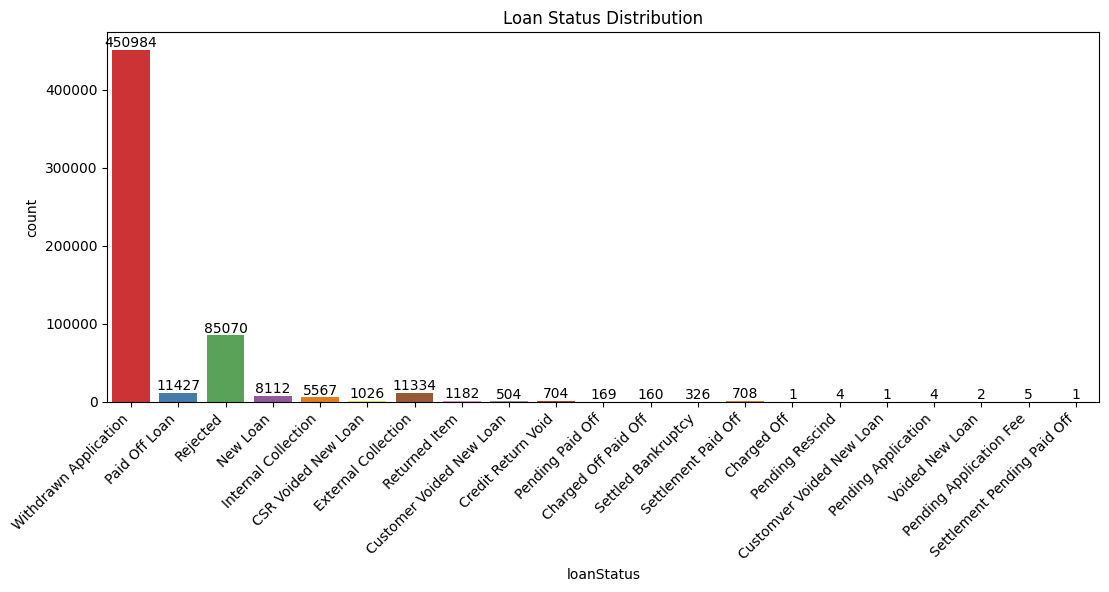

In [34]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Loan Status Distribution")
loanStatus_distribution = sns.countplot(
    data=df_cleaned, x="loanStatus", hue="loanStatus", palette='Set1', legend=False)
for container in loanStatus_distribution.containers:
    loanStatus_distribution.bar_label(container)
for item in loanStatus_distribution.get_xticklabels():
    item.set_rotation(45)
    item.set_horizontalalignment('right')
plt.show()

### IV.E.9. Loan Amount Distribution

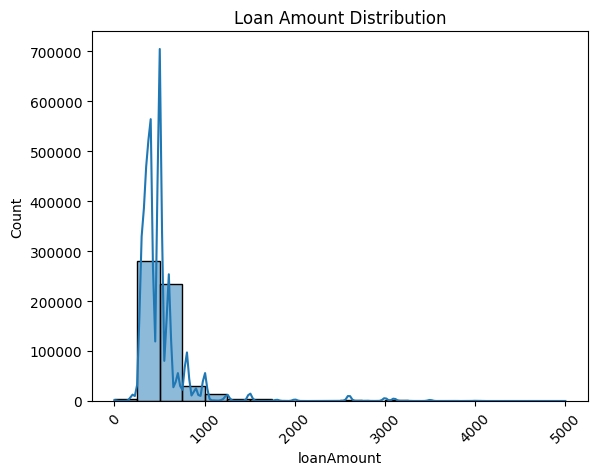

In [46]:
plt.title("Loan Amount Distribution")
loanAmount_bins = np.arange(df_cleaned["loanAmount"].min(), df_cleaned["loanAmount"].max(), 250)
loanAmount_plot = sns.histplot(data = df_cleaned,
                               x = "loanAmount",
                               bins = loanAmount_bins,
                               kde = True)
originallyScheduledPaymentAmount_plot.set_xticks(originallyScheduledPaymentAmount_bins)
plt.xticks(rotation = 45)
plt.show()

### IV.E.10. Originally Scheduled Payment Amount Distribution

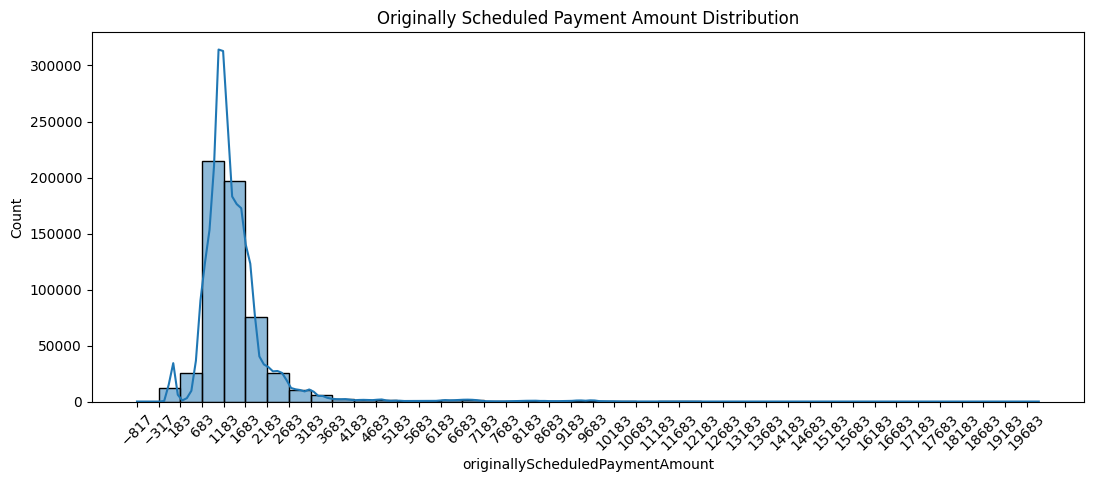

In [50]:
plt.figure(figsize=(12.8, 4.8))
plt.title("Originally Scheduled Payment Amount Distribution")
originallyScheduledPaymentAmount_bins = np.arange(df_cleaned["originallyScheduledPaymentAmount"].min(), df_cleaned["originallyScheduledPaymentAmount"].max(), 500)
originallyScheduledPaymentAmount_plot = sns.histplot(data = df_cleaned,
                                                     x = "originallyScheduledPaymentAmount",
                                                     bins = originallyScheduledPaymentAmount_bins,
                                                     kde = True)
originallyScheduledPaymentAmount_plot.set_xticks(originallyScheduledPaymentAmount_bins)
plt.xticks(rotation = 45)
plt.show()

**Note**: As observed from the visualization, there are some unusual occurrences where the originally scheduled repayment amounts are negative. This implies that MoneyLion would have to pay the borrower instead of the borrower repaying MoneyLion. We will investigate this occurences further.

In [ ]:
# Code here to check the visualization above

In [ ]:
# Barplot
plt.title("Target Label Proportion")
y_proportion = sns.countplot(x=y, hue=y, palette='Set2')
for container in y_proportion.containers:
    y_proportion.bar_label(container)
plt.show()

In [ ]:
# Pie Chart
plt.title("Target Label Proportion")
plt.pie(x=y.value_counts(),
        labels=y.value_counts(),
        colors=sns.color_palette('Set2'),
        autopct='%1.1f%%')
plt.show()

## IV.F. Statistical Analysis

### IV.F.1. Statistical Description

In [ ]:
X.describe()

### IV.F.2. Skewness Analysis

In [ ]:
numeric_columns = X.select_dtypes(include=[np.number]).columns
X_skewness = X[numeric_columns].skew()
X_skewness = pd.DataFrame(
    {"variables": X_skewness.index, "skewness": X_skewness.values})

In [ ]:
plt.title("Skewness Analysis")
skewness_plot = sns.barplot(x="variables", y="skewness", data=X_skewness)
for container in skewness_plot.containers:
    skewness_plot.bar_label(container)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Variables")
plt.ylabel("Skewness")
plt.show()

### IV.F.3. Chi-Squared Analysis

Analyze the independence or dependence between categorical variables and assess the goodness of fit of observed data to an expected distribution.

In [ ]:
X_categorical = X.select_dtypes(include='object').copy()
X_numerical = X.select_dtypes(include='number').copy()
X_categorical.shape, X_numerical.shape

In [ ]:
X_categorical.columns

In [ ]:
X_numerical.columns

In [ ]:
chi2_list = []

for column in X_categorical.columns:
    cross_tab = pd.crosstab(y, X_categorical[column])
    chi2, p_value, degree_of_freedom, expected_frequencies = chi2_contingency(
        cross_tab)
    chi2_list.append({"variables": column, "p-value": round(p_value, 10)})

chi2_result = pd.DataFrame(chi2_list)
chi2_result = chi2_result.sort_values(by="p-value", ascending=True)
chi2_result.reset_index(drop=True, inplace=True)
chi2_result

### IV.F.4. T-Statistics Analysis

Assess if there is a significant difference in means between two groups, such as comparing the mean scores of a continuous variable between two treatment groups.

In [ ]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [ ]:
t_test_results = pd.DataFrame()

for variable in X_numerical.columns:
    group_0_values = X_numerical.loc[y == 0, variable]
    group_1_values = X_numerical.loc[y == 1, variable]
    t_statistic, p_value = ttest_ind(group_0_values, group_1_values)
    result_df = pd.DataFrame(
        {"variables": [variable], "t-statistic": [t_statistic], "p-value": [p_value]})
    t_test_results = pd.concat([t_test_results, result_df], ignore_index=True)

t_test_table = t_test_results.sort_values(by="t-statistic", ascending=False)
t_test_table.reset_index(drop=True, inplace=True)
t_test_table

### IV.F.5. ANOVA F Analysis

Compare more than two groups, such as comparing the mean scores of a continuous variable among different experimental conditions.

In [ ]:
X_numerical.fillna(X_numerical.mean(), inplace=True)

In [ ]:
f_statistic, p_values = f_classif(X_numerical, y)

anova_f_table = pd.DataFrame({"variables": X_numerical.columns,
                             "f-score": f_statistic, "p-value": p_values.round(decimals=10)})
anova_f_table.sort_values(by="f-score", ascending=False,
                          inplace=True, ignore_index=True)
anova_f_table

## IV.G. Correlation Analysis

In [ ]:
corr_matrix = X_numerical.corr()

In [ ]:
plt.title("Correlation Heatmap")
sns.heatmap(data=corr_matrix, annot=True)
plt.show()

In [ ]:
high_corr_list = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname1, colname2 = corr_matrix.columns[i], corr_matrix.columns[j]
            high_corr_list.append([colname1, colname2, corr_matrix.iloc[i, j]])

high_corr_df = pd.DataFrame(high_corr_list, columns=["column_1", "column_2", "correlation_value"])
high_corr_df

# V. Preprocessing

## V.A. Columns Reorder

In [ ]:
custom_order = ["column_0", "column_1", "column_2"]

In [ ]:
X = X.reindex(columns=custom_order)
X.shape

In [ ]:
X.head()

## V.C. Imbalance Data Preprocessing

### V.C.1. Random Undersampling

In [ ]:
rus = RandomUnderSampler(random_state=777)
X_undersampled, y_undersampled = rus.fit_resample(X, y)
y_undersampled.value_counts()

### V.C.2. Random Oversampling

In [ ]:
ros = RandomOverSampler(random_state=777)
X_oversampled, y_oversampled = ros.fit_resample(X, y)
y_oversampled.value_counts()

### V.C.3. Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
categorical_features = X.dtypes == 'object'
categorical_features = categorical_features.tolist()
smote = SMOTENC(categorical_features=categorical_features, random_state=777)
X_smote, y_smote = smote.fit_resample(X, y)
y_smote.value_counts()

## V.D. Data Splitting

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=777, stratify=y)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
y_train.shape, y_test.shape

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

## V.E. Export Data

In [ ]:
X_train.to_pickle('../../data/processed/X_train.pkl')
X_test.to_pickle('../../data/processed/X_test.pkl')
y_train.to_pickle('../../data/processed/y_train.pkl')
y_test.to_pickle('../../data/processed/y_test.pkl')